# Straight line Hough transform
### Dr. Tirthajyoti Sarkar, Fremont CA 94536

The Hough transform in its simplest form is a method to detect straight lines.

In the following example, we construct an image with a line intersection. We then use the **[Hough transform](https://en.wikipedia.org/wiki/Hough_transform)**. to explore a parameter space for straight lines that may run through the image.

### Algorithm overview
Usually, lines are parameterised as $y=mx+c$, with a gradient $m$ and y-intercept $c$. However, this would mean that $m$ goes to infinity for vertical lines. Instead, we therefore construct a segment perpendicular to the line, leading to the origin. The line is represented by the length of that segment, $r$, and the angle it makes with the x-axis, $\theta$.

The Hough transform constructs a histogram array representing the parameter space (i.e., an $M\times N$ matrix, for $M$ different values of the radius and $N$ different values of $\theta$). For each parameter combination, $r$ and $\theta$, we then find the number of non-zero pixels in the input image that would fall close to the corresponding line, and increment the array at position $(r,θ)$ appropriately.

We can think of each non-zero pixel “voting” for potential line candidates. The local maxima in the resulting histogram indicates the parameters of the most probably lines. In our example, the maxima occur at 45 and 135 degrees, corresponding to the normal vector angles of each line.

In [1]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

### Test image

In [2]:
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

### Classic straight-line Hough transform

In [3]:
h, theta, d = hough_line(image)

### Show

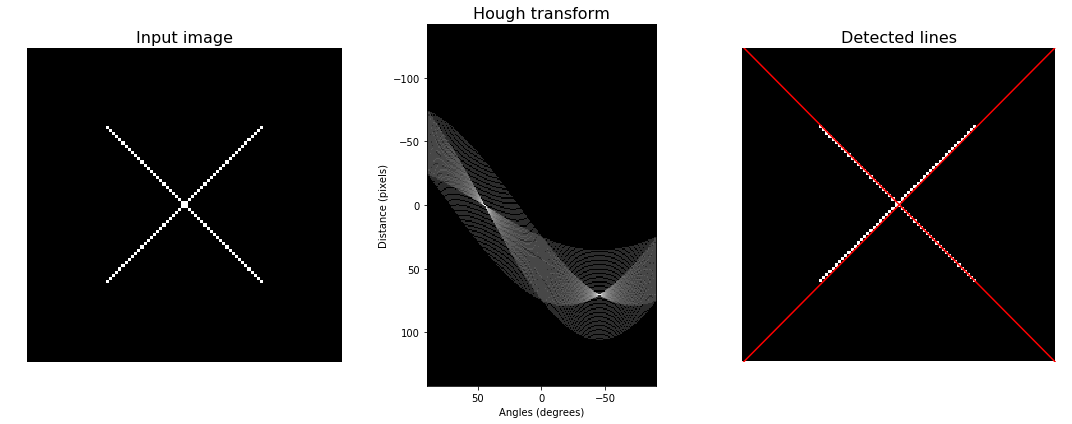

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image',fontsize=16)
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform',fontsize=16)
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines',fontsize=16)

plt.tight_layout()
plt.show()

### Probabilistic Hough Transform
It is based on the assumption that using a random subset of voting points give a good approximation to the actual result, and that lines can be extracted during the voting process by walking along connected components. This returns the beginning and end of each line segment, which is useful.

The function `probabilistic_hough` has three parameters:

* a general threshold that is applied to the Hough accumulator, 
* a minimum line length and 
* the line gap that influences line merging. 

In the example below, we find lines longer than 10 with a gap less than 3 pixels

In [6]:
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

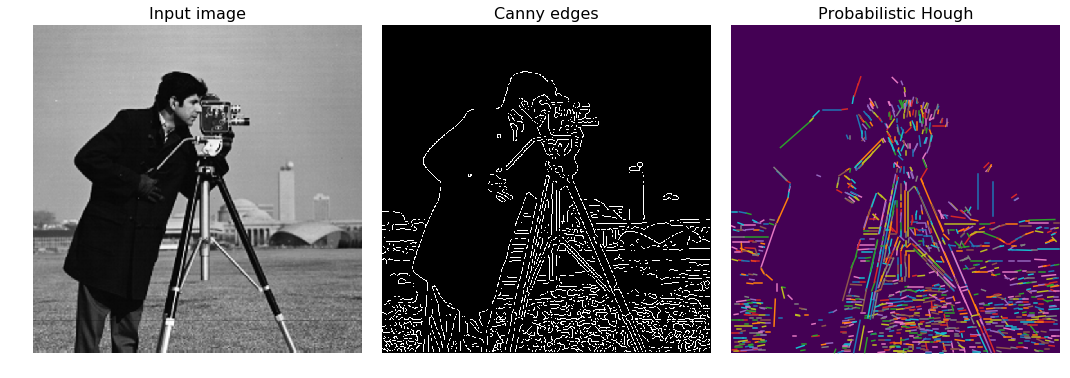

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image',fontsize=16)

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges',fontsize=16)

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough',fontsize=16)

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()